In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key
import time
from scipy.stats import linregress

In [2]:
# create a set of random lat and long combinations
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# city list
cities = []

# gets nearest city for each lat/long combo
for coords in coordinates:
    city = citipy.nearest_city(coords[0], coords[1]).city_name
    
    # if the city is unique, then add to list
    if city not in cities:
        cities.append(city)

# print count to confirm sufficient
len(cities)

597

In [5]:
# basic url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [ ]:
# list of city data
city_data = []

# print beginning of the logging
print('Beginning Data Retrieval     ')
print('-----------------------------')

# counters
record_count = 1
set_count = 1

# loop through all cities in list
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # endpoint URL for ech city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # log the url, record, and set numbers for the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nantucket
Processing Record 2 of Set 1 | sola
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | sorland
Processing Record 7 of Set 1 | nguiu
City not found. Skipping...
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | mahibadhoo
Processing Record 11 of Set 1 | sao filipe
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | aklavik
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | tapaua
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | shepsi
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | nikolskoye
Processin

In [7]:
len(city_data)

551

In [8]:
# convert city data to dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,75.99,59,4,6.91,US,2020-08-17 21:00:08
1,Chuy,-33.70,-53.46,49.91,76,0,6.17,UY,2020-08-17 21:01:18
2,Hammerfest,70.66,23.68,44.60,93,75,28.86,NO,2020-08-17 21:01:19
3,Beloha,-25.17,45.05,64.69,94,27,8.52,MG,2020-08-17 20:56:47
4,Barrow,71.29,-156.79,46.40,87,75,20.80,US,2020-08-17 20:56:31
5,Castro,-24.79,-50.01,60.85,95,100,6.78,BR,2020-08-17 21:01:20
6,San Jose Del Boqueron,15.48,-87.87,89.60,55,75,11.41,HN,2020-08-17 21:01:20
7,Bethel,41.37,-73.41,78.01,74,54,4.81,US,2020-08-17 20:58:32
8,Hermanus,-34.42,19.23,48.99,77,94,5.99,ZA,2020-08-17 21:01:20
9,Sitka,57.05,-135.33,57.20,82,75,4.70,US,2020-08-17 20:56:35


In [9]:
# reorder columns
new_order_cols = ['City', 'Country', 'Date', 'Lat', 'Lng', 
                    'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order_cols]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-08-17 21:00:08,42.60,-73.97,75.99,59,4,6.91
1,Chuy,UY,2020-08-17 21:01:18,-33.70,-53.46,49.91,76,0,6.17
2,Hammerfest,NO,2020-08-17 21:01:19,70.66,23.68,44.60,93,75,28.86
3,Beloha,MG,2020-08-17 20:56:47,-25.17,45.05,64.69,94,27,8.52
4,Barrow,US,2020-08-17 20:56:31,71.29,-156.79,46.40,87,75,20.80
5,Castro,BR,2020-08-17 21:01:20,-24.79,-50.01,60.85,95,100,6.78
6,San Jose Del Boqueron,HN,2020-08-17 21:01:20,15.48,-87.87,89.60,55,75,11.41
7,Bethel,US,2020-08-17 20:58:32,41.37,-73.41,78.01,74,54,4.81
8,Hermanus,ZA,2020-08-17 21:01:20,-34.42,19.23,48.99,77,94,5.99
9,Sitka,US,2020-08-17 20:56:35,57.05,-135.33,57.20,82,75,4.70


In [10]:
# create outfile file
output_data_file = "weather_data/cities.csv"
# export city_data_df into csv
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [18]:
# get relevant fields from dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

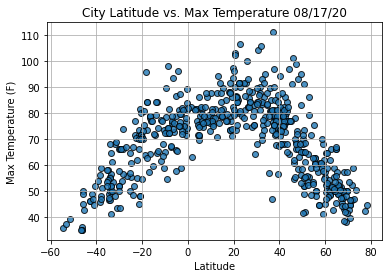

In [15]:
# scatter plot for lat vs max temp
plt.scatter(lats, max_temps,
            edgecolor = 'black', linewidths = 1, marker = 'o', alpha = .8, label = 'Cities')

# other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig('weather_data/Fig1.png')

# show plot
plt.show()

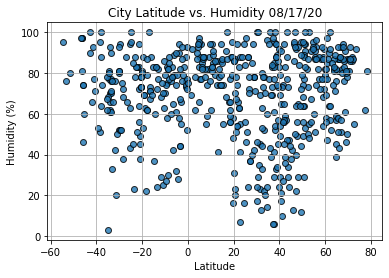

In [16]:
# scatter plot for lat vs humidity
plt.scatter(lats, humidity,
            edgecolor = 'black', linewidths = 1, marker = 'o', alpha = .8, label = 'Cities')

# other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig('weather_data/Fig2.png')

# show plot
plt.show()

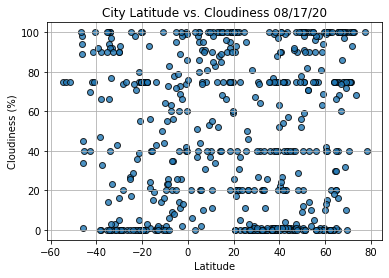

In [19]:
# scatter plot for lat vs cloudiness
plt.scatter(lats, cloudiness,
            edgecolor = 'black', linewidths = 1, marker = 'o', alpha = .8, label = 'Cities')

# other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig('weather_data/Fig3.png')

# show plot
plt.show()

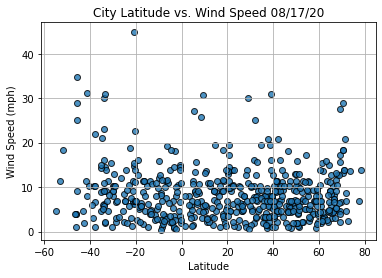

In [21]:
# scatter plot for lat vs wind speed
plt.scatter(lats, wind_speed,
            edgecolor = 'black', linewidths = 1, marker = 'o', alpha = .8, label = 'Cities')

# other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig('weather_data/Fig4.png')

# show plot
plt.show()

In [31]:
# function to perform linear regression on the weather data and plot regression line
def plot_linear_regression(x, y, title, y_label, text_coords):
    
    # run regerssion on weather data
    (m, yint, r, p, std_err) = linregress(x, y)
    
    # calculate regression line y values from m and yint
    regress_values = x * m + yint
    # equation of the line
    line_eq = 'y = ' + str(round(m,2)) + 'x + ' + str(round(yint, 2))
    
    # scatter plot and regression line
    plt.scatter(x,y)
    plt.plot(x, regress_values, 'r')
    
    # text for line equations
    plt.annotate(line_eq, text_coords, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
# northern and southern hemisphere dataframes
north_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
south_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

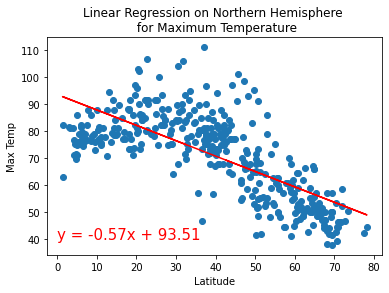

In [34]:
# linear regression on northern hemi, lat vs max temp
x = north_df['Lat']
y = north_df['Max Temp']

plot_linear_regression(x, y, 'Linear Regression on Northern Hemisphere \n for Maximum Temperature',
                        'Max Temp', (0,40))

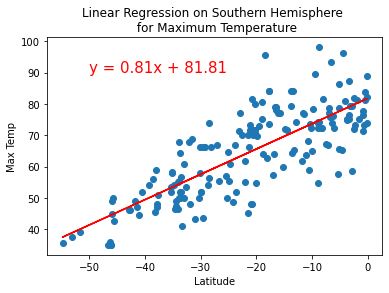

In [36]:
# linear regression on southern hemi, lat vs max temp
x = south_df['Lat']
y = south_df['Max Temp']

plot_linear_regression(x, y, 'Linear Regression on Southern Hemisphere \n for Maximum Temperature',
                        'Max Temp', (-50,90))

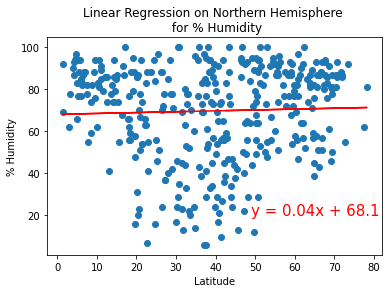

In [42]:
# linear regression on northern hemi, lat vs humidity
x = north_df['Lat']
y = north_df['Humidity']

plot_linear_regression(x, y, 'Linear Regression on Northern Hemisphere \n for % Humidity',
                        '% Humidity', (49,20))

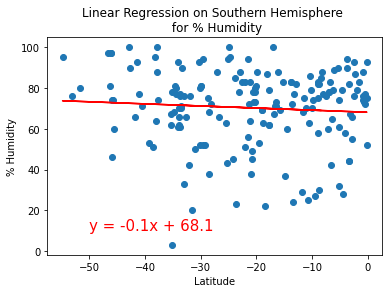

In [47]:
# linear regression on southern hemi, lat vs humidity
x = south_df['Lat']
y = south_df['Humidity']

plot_linear_regression(x, y, 'Linear Regression on Southern Hemisphere \n for % Humidity',
                        '% Humidity', (-50,10))

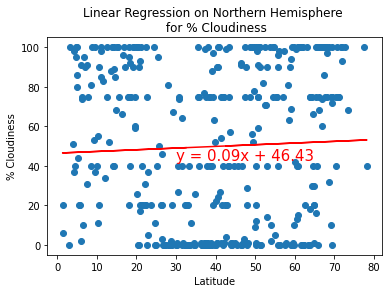

In [52]:
# linear regression on northern hemi, lat vs cloudiness
x = north_df['Lat']
y = north_df['Cloudiness']

plot_linear_regression(x, y, 'Linear Regression on Northern Hemisphere \n for % Cloudiness',
                        '% Cloudiness', (30,43))

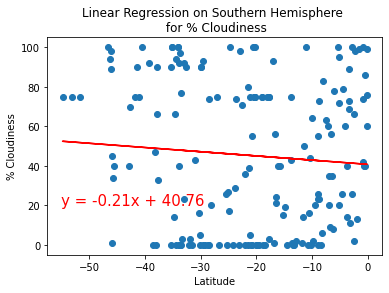

In [54]:
# linear regression on southern hemi, lat vs cloudiness
x = south_df['Lat']
y = south_df['Cloudiness']

plot_linear_regression(x, y, 'Linear Regression on Southern Hemisphere \n for % Cloudiness',
                        '% Cloudiness', (-55,20))

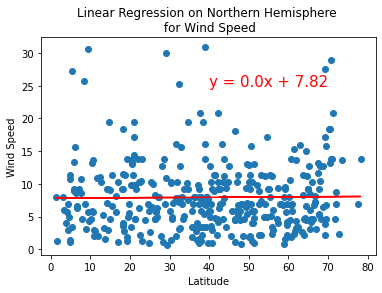

In [56]:
# linear regression on northern hemi, lat vs wind speed
x = north_df['Lat']
y = north_df['Wind Speed']

plot_linear_regression(x, y, 'Linear Regression on Northern Hemisphere \n for Wind Speed',
                        'Wind Speed', (40,25))

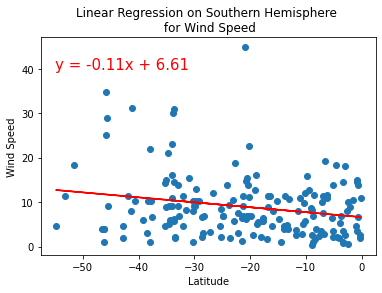

In [58]:
# linear regression on southern hemi, lat vs wind speed
x = south_df['Lat']
y = south_df['Wind Speed']

plot_linear_regression(x, y, 'Linear Regression on Southern Hemisphere \n for Wind Speed',
                        'Wind Speed', (-55,40))